In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
import emcee

In [57]:
data = np.random.normal(loc = 1, scale= 1, size = 100)

In [58]:
def logprior(mu):
    if -5.0 < mu < 5.0:
        return 0.0
    return -np.inf

def nll(mu,x,sigma):
    return -np.sum((x-mu)**2/(2*sigma**2))

def full_log(mu,x,sigma):
    lp = logprior(mu)
    if not np.isfinite(lp):
        return -np.inf
    return lp + nll(mu, x, sigma)

In [59]:
ndim, nwalkers = 1, 20
pos = [np.array([x]) for x in np.random.normal(1,1,size=nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, full_log, args=(data,1.0))
_ = sampler.run_mcmc(pos, 100)

In [60]:
samples = sampler.chain

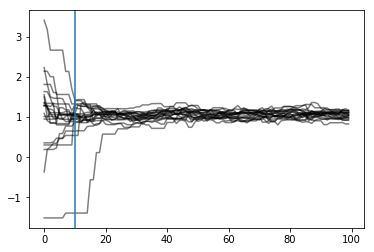

In [61]:
cutiteration = 10
for x in samples:
    plt.plot(x, alpha = 0.5, c = 'k')
plt.axvline(cutiteration)

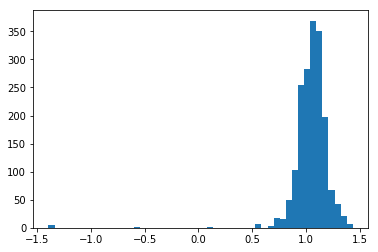

In [62]:
samples = sampler.chain[:, cutiteration:, :].reshape((-1, ndim))
_=plt.hist(samples[:,0], bins = 50)

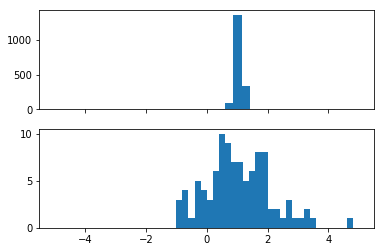

In [63]:
f,ax = plt.subplots(2,sharex = True)
_=ax[0].hist(samples[:,0])
_=ax[1].hist(data, np.linspace(-5,5,51))

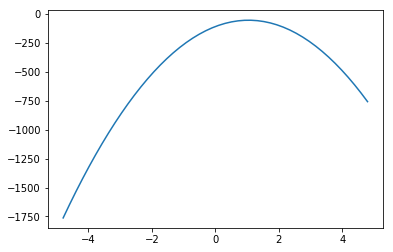

In [64]:
test_mus = np.linspace(-5,5)
nlls = [full_log(test_mu,data,1.0) for test_mu in test_mus]
plt.plot(test_mus,nlls)